C:\Users\mihir\AppData\Local\Temp\ipykernel_20324\1639581813.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['completion_ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinite values


Random Forest Accuracy: 64.23%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.15      0.21       904
           1       0.70      0.85      0.77      2096

    accuracy                           0.64      3000
   macro avg       0.51      0.50      0.49      3000
weighted avg       0.58      0.64      0.60      3000

Gradient Boosting Accuracy: 66.27%

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.09      0.14       904
           1       0.70      0.91      0.79      2096

    accuracy                           0.66      3000
   macro avg       0.50      0.50      0.46      3000
weighted avg       0.58      0.66      0.59      3000

Voting Classifier Accuracy: 62.77%

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.19      0.23       904
           1  

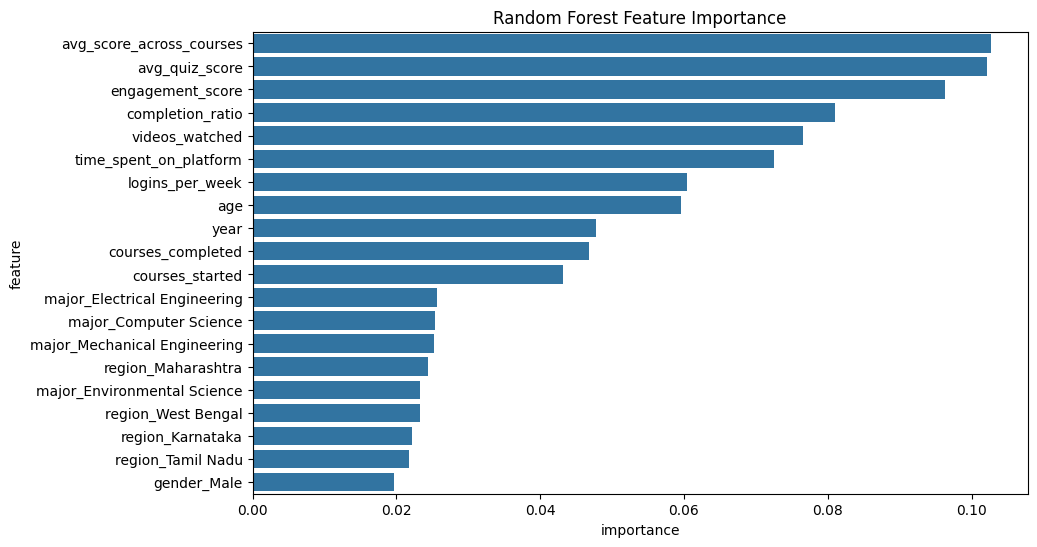

The most important factors for predicting course completion using Voting Classifier are: ['avg_score_across_courses' 'avg_quiz_score' 'engagement_score'
 'completion_ratio' 'videos_watched']


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Set seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 10000

# Generate synthetic data for students
student_id = np.arange(1, n_students + 1)
age = np.random.randint(18, 25, size=n_students)
gender = np.random.choice(['Male', 'Female'], size=n_students)
majors = ['Computer Science', 'Mechanical Engineering', 'Environmental Science', 
          'Civil Engineering', 'Electrical Engineering']
major = np.random.choice(majors, size=n_students)
year = np.random.randint(1, 5, size=n_students)
regions = ['West Bengal', 'Delhi', 'Karnataka', 'Maharashtra', 'Tamil Nadu']
region = np.random.choice(regions, size=n_students)

# Engagement Data
logins_per_week = np.random.randint(1, 10, size=n_students)
videos_watched = np.random.randint(1, 20, size=n_students)
time_spent_on_platform = np.random.randint(1, 15, size=n_students)
avg_quiz_score = np.random.randint(0, 100, size=n_students)

# Historical Data
courses_completed = np.random.randint(0, 6, size=n_students)  # Allow zero completed
courses_started = np.random.randint(2, 7, size=n_students)
avg_score_across_courses = np.random.randint(0, 100, size=n_students)

# Create a DataFrame
data = pd.DataFrame({
    'student_id': student_id,
    'age': age,
    'gender': gender,
    'major': major,
    'year': year,
    'region': region,
    'logins_per_week': logins_per_week,
    'videos_watched': videos_watched,
    'time_spent_on_platform': time_spent_on_platform,
    'avg_quiz_score': avg_quiz_score,
    'courses_completed': courses_completed,
    'courses_started': courses_started,
    'avg_score_across_courses': avg_score_across_courses
})

# Randomly assign completion status based on some probabilistic logic
data['completion_status'] = np.random.choice([0, 1], size=n_students, p=[0.3, 0.7])  # Assuming a dropout rate

# Feature Engineering
# Create new features based on existing ones
data['engagement_score'] = (data['logins_per_week'] * 0.5 + 
                             data['videos_watched'] * 0.3 + 
                             data['time_spent_on_platform'] * 0.2)

data['completion_ratio'] = data['courses_completed'] / data['courses_started']
data['completion_ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinite values

# Split the data into features and target
X = data.drop(columns=['student_id', 'completion_status'])
y = data['completion_status']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Train a Gradient Boosting classifier on the resampled data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

# Initialize Voting Classifier with Random Forest and Gradient Boosting
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
], voting='hard')

# Train the Voting Classifier on the resampled data
voting_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using the Voting Classifier
y_pred_voting = voting_model.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

# Display the model performance
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("\nRandom Forest Classification Report:")
print(report_rf)

print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")
print("\nGradient Boosting Classification Report:")
print(report_gb)

print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")
print("\nVoting Classifier Classification Report:")
print(report_voting)

# Feature importance (using Random Forest feature importance as an example)
importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_rf)
plt.title('Random Forest Feature Importance')
plt.show()

# Suggestions based on Random Forest feature importance
important_features_rf = importance_rf.head(5)['feature'].values
print(f"The most important factors for predicting course completion using Voting Classifier are: {important_features_rf}")